In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

from reglib import cost, hypothesis, gradient_descent

In [2]:
DATA_PATH = 'data/ex1data1.txt'
cols = np.loadtxt(
    DATA_PATH,
    delimiter=',',
    usecols=(0,1),
    unpack=True
)

iterations = 1500                      # Number of Iterations
alpha = 0.01                           # Learning Rate
X = np.transpose(np.array(cols[:-1]))  # 1 x n matrix
X = np.insert(X,0,1,axis=1)            # 2 x n matrix (adding first col of 1s for dot product optomization)
Y = np.transpose(np.array(cols[-1:]))  # n-dimensional vector
m = Y.size                             # number of training examples

Text(0.5, 0, 'City Population (10,000)')

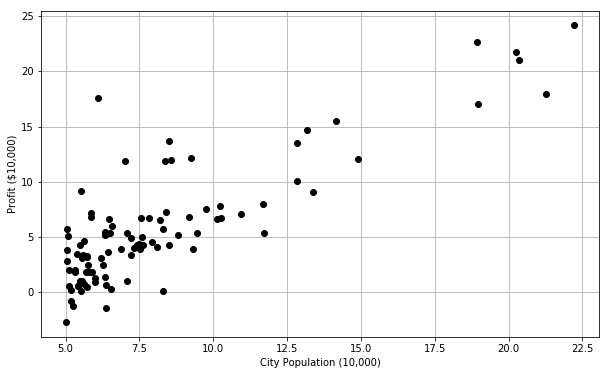

In [3]:
plt.figure(figsize=(10,6))
plt.plot(cols[0], cols[1], 'o', color='black');
plt.grid(True)
plt.ylabel('Profit ($10,000)')
plt.xlabel('City Population (10,000)')

In [4]:
#Test that running computeCost with 0's as theta returns 32.07:

initial_theta = np.zeros((X.shape[1],1)) #(theta is a vector with n rows and 1 columns (if X has n features) )
print(cost(initial_theta,X,Y, m))

32.072733877455676


In [5]:
initial_theta = np.zeros((X.shape[1],1))

theta, thetahistory, jvec = gradient_descent(X, Y, m, alpha, iterations, initial_theta)

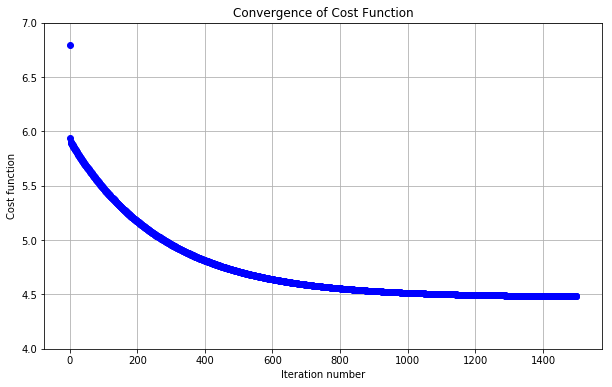

In [6]:
#Plot the convergence of the cost function
def plotConvergence(jvec):
    plt.figure(figsize=(10,6))
    plt.plot(range(len(jvec)),jvec,'bo')
    plt.grid(True)
    plt.title("Convergence of Cost Function")
    plt.xlabel("Iteration number")
    plt.ylabel("Cost function")
    dummy = plt.xlim([-0.05*iterations,1.05*iterations])
    dummy = plt.ylim([4,8])


plotConvergence(jvec)
dummy = plt.ylim([4,7])

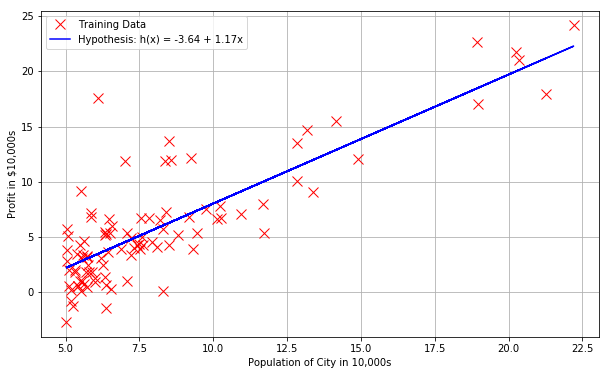

In [7]:
#Plot the line on top of the data to ensure it looks correct
def myfit(xval):
    return theta[0] + theta[1]*xval
plt.figure(figsize=(10,6))
plt.plot(X[:,1],Y[:,0],'rx',markersize=10,label='Training Data')
plt.plot(X[:,1],myfit(X[:,1]),'b-',label = 'Hypothesis: h(x) = %0.2f + %0.2fx'%(theta[0],theta[1]))
plt.grid(True) #Always plot.grid true!
plt.ylabel('Profit in $10,000s')
plt.xlabel('Population of City in 10,000s')
plt.legend()